**IMPORTING DATA**   Name: Food Oracle - Recipe Recommender


In [1]:
# Spoonacular API Call
import requests
import json
import random
from IPython.display import Image, display

BASE_URL = 'https://api.spoonacular.com/recipes/complexSearch'
API_KEY = '2e95f541d94949ab81e14de02fa6bd57'

In [2]:
# Setup cell to make print() wrap text in Colab
import builtins, textwrap

def wrapped_print(*args, width=80, **kwargs):
    """
    Works just like the normal print(), but long text
    will automatically wrap to the given width.
    """
    new_args = [textwrap.fill(str(a), width=width) for a in args]
    builtins.print(*new_args, **kwargs)

# Replace the default print with our wrapped version
print = wrapped_print

print("✅ Print has been updated! Long lines will now wrap automatically.")

✅ Print has been updated! Long lines will now wrap automatically.


Pasta example (do not uncomment)

**PROJECT** 🍂😄

**FUNCTIONS...**

In [3]:
# Assigning key recipe words in a dict to a set of moods:

def mood_mapper(mood):
  mood_keywords = {
      'happy' : ['dessert','fruit','citrus','banana','berry','cheeseburger','taco'],
      'sad' : ['soup','chocolate','alcohol','rich','cream','pie','casserole'],
      'angry' : ['spicy','hot','tangy','pepper','chili','noodles','stirfry'],
      'romantic' : ['pasta','chocolate','wine','steak','lobster','lasagna'],
      'neutral' : ['simple','clean','chicken','vanilla'],
      'scared' : ['comfort','tea','warm','yogurt','blueberry'],
      'tired' : ['simple','basic','lazy','bowl'],
  }
  return mood_keywords.get(mood.lower())

In [4]:
# Assigning key recipe words in a dict to each season:

def season_mapper(season):
  season_keywords = {
      'winter' : ['cookie','stew','holiday','christmas','chestnut','milk','coffee'],
      'spring' : ['fresh','salad','vegetable','fruit','carrot','bean','turnip'],
      'summer' : ['barbeque','fish','lemon','ice','ice cream','cherry','peach'],
      'fall' or 'autumn' : ['pumpkin','turkey','apple','candy','pecan','sweet potato','walnut']
  }
  return season_keywords.get(season.lower())

In [5]:
# Loading in Spoonacular recipe data

def recipe_data_finder(keywords):
    url = (f'{BASE_URL}')

    params = {
        "query": keywords,
        "number": 3,
        "apiKey": API_KEY
    }

    response = requests.get(url, params=params)
    # print(keywords)
    # print(response.status_code)

    if response.status_code == 200:
        data = response.json()
        return data

    else:
        print(f"Error")
        return []

# Test...
# print(recipe_data_finder('cookie'))

In [6]:
# Function to represent data

def show_recipe_info(results):

    recipe = results["results"][0]
    id = recipe["id"]
    title = recipe["title"]
    return (recipe, id, title)

# Test...
# results = recipe_data_finder('meat')
# print(show_recipe_info(results))

In [7]:
# Basic workflow of the project, grabbing recipe data

def user_mood_season_input():
  keywords = []

  print('The available moods for FOOD ORACLE are: happy, sad, angry, romantic, neutral, scared, and tired.')
  print('\n')
  user_input_mood = input('Enter your current mood: ').lower()
  print('\n')
  moodkw = mood_mapper(user_input_mood)
  if moodkw is None:
    print('Not an applicable mood.')
    return('Please try again.')
  else:
    keywords.append(moodkw)
  # print(','.join(keywords).title()) -- Test


  user_input_season = input('Enter the current season: ').lower()
  seasonkw = season_mapper(user_input_season)
  if seasonkw is None:
    print('That is not a season.')
    return('Please try again.')
  else:
    keywords.append(seasonkw)

  keywords = keywords[0] + keywords[1] # Combining mood and season lists
  # print(keywords) -- Test

  randomizer = [] # Randomizing keywords from combined list

  options = random.sample(keywords, k=3)
  # print(options) -- Test
  for option in options:
    recipe_data = recipe_data_finder(option)
    recipes = recipe_data['results']
    first_recipe = recipes[0]
    randomizer.append(first_recipe)

  return randomizer

  # Previous unrandomized code:
  # keywords = keywords[0] + keywords[1]
  # # keywords = (', '.join(keywords).lower())
  # random_num = random.randint(0,len(keywords)-1)
  # option = keywords[random_num]

  # return(recipe_data_finder(option))

recipes_list = (user_mood_season_input())
# print(recipes_list)


The available moods for FOOD ORACLE are: happy, sad, angry, romantic, neutral,
scared, and tired.

Enter your current mood: happy

Enter the current season: winter


In [8]:
# Pretty printing user's selected recipes and assigning images

def pretty_print_recipes(recipes):

  recipe_num_counter = 0
  for recipe in recipes:
    # Recipe 1: Red Lentil Soup with Chicken and Turnips -- Example
    recipe_num_counter += 1
    print(f'Recipe {recipe_num_counter}: {recipe['title']}')
    img_url = recipe['image']
    display(Image(img_url, width=200))

# pretty_print_recipes(recipes_list) -- Test

Which recipe would you like to make? You must select one.
Enter your selected number: 3
Coffee Chia Pudding
Source URL: https://www.foodista.com/recipe/JRRN2VFD/coffee-chia-pudding
Recipe summary: Coffee Chia Pudding might be just the dessert you are searching
for. One serving contains <b>270 calories</b>, <b>8g of protein</b>, and <b>16g
of fat</b>. This gluten free, dairy free, and fodmap friendly recipe serves 2
and costs <b>$1.27 per serving</b>. 1 person were glad they tried this recipe.
This recipe from Foodista requires coffee, almond milk, vanillan extract, and
chia seeds. From preparation to the plate, this recipe takes approximately <b>4
hours and 10 minutes</b>. Overall, this recipe earns a <b>good spoonacular score
of 62%</b>. <a href="https://spoonacular.com/recipes/coffee-and-chocolate-chia-
seed-pudding-553412">Coffee and chocolate chia seed pudding</a>, <a
href="https://spoonacular.com/recipes/overnight-chocolate-coffee-chia-breakfast-
pudding-1240595">Overnight Chocola

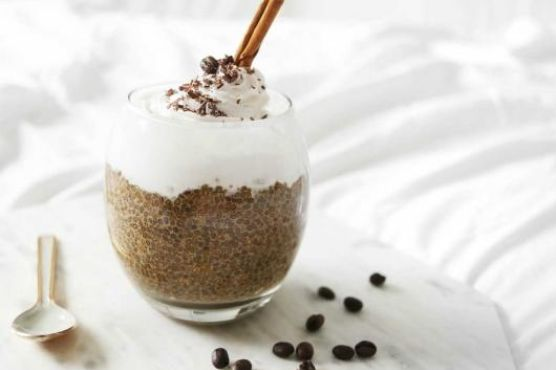

In [9]:
def favorite_recipe(recipes):

# User chooses favorite recipe
# We want to show user title, image, sourceURL, and summary of chose recipe.

# Which recipe would you like more information about? You must select one.
# Choose between 1, 2, or 3
# Return summary of the dish


  print('Which recipe would you like to make? You must select one.')
  user_input_choice = input('Enter your selected number: ')

  chosen_id = ''
  if user_input_choice == '1':
    chosen_id = recipes[0]['id']
  elif user_input_choice == '2':
    if len(recipes) < 2: # In case they have a dietary restriction
      print('Invalid number chosen.')
      return
    else:
      chosen_id = recipes[1]['id']
  elif user_input_choice == '3':
     if len(recipes) < 3: # In case they have a dietary restriction
      print('Invalid number chosen.')
      return
     else:
      chosen_id = recipes[2]['id']
  else:
    print('Please pick a vaild number.')
    return

  # SECOND API call to get more recipe-specfic information 😄

  INFO_URL = (f'https://api.spoonacular.com/recipes/{chosen_id}/information')

  url = (f'{INFO_URL}')
  # print(url)

  params = {
        "apiKey": API_KEY
    }

  response = requests.get(url, params=params)

  # print(response.status_code) -- Test if API fails, see what problem is
  if response.status_code == 200:
      recipe_data = response.json()
      # return recipe_data
  else:
      print(f"Error")
      return []

  print(recipe_data['title'])
  print(f'Source URL: {recipe_data['sourceUrl']}')
  print(f'Recipe summary: {recipe_data['summary']}')
  img_url = recipe_data['image']
  display(Image(img_url, width=200))

  return

(favorite_recipe(recipes_list))

In [10]:
# Limiting options if user has dietary restriction

def ask_diet_choice():
  #asking the user if they have dietary restrictions
  print('\n')
  print("Do you have any dietary restrictions?")
  print("Options: none, vegan, vegetarian, gluten free, dairy free, nut allergy")

  #keep asking until the user gives a valid dietary choice
  while True:
    diet = input("Enter your choice: ").strip().lower()
    #acceptable responses
    if diet in ["none", "vegan", "vegetarian", "gluten free", "dairy free", "nut allergy"]:
      return diet
    #if input is invalid, prompt the user again
    else:
      print("Please type one of: none, vegan, vegetarian, gluten free, dairy free, nut allergy.")

def contains_keyword(title, word_list):
  #check if any keyword from word_list appears in one of the recipe titles
  for word in word_list:
    if word in title:
      return True
  return False

def filter_recipes_by_diet(recipes, diet_choice):
  #if the user has no dietary restrictions, return all recipes
  if diet_choice == "none":
    return recipes
  filtered = []

  #keyword lists for each restriction category
  meat_words = ["chicken", "beef", "pork", "bacon", "ham", "shrimp", "fish", "steak", "turkey", "sausage"]
  dairy_words = ["cheese", "milk", "cream","butter", "yogurt", "ice cream"]
  gluten_words = ["bread", "pasta", "noodle", "flour", "bun", "bagel", "cracker", "tortilla"]
  nut_words = ["nut", "walnut", "pecan", "almond", "cashew", "peanut", "pistachio", "hazelnut"]

  #loop through each recipe and check whether it violates the restriction
  for recipe in recipes:
    #get recipe title and convert to lowercase for consistent matching
    title = str(recipe.get("title", "")).lower()
    #check if the recipe contains restricted ingredients
    has_meat = contains_keyword(title, meat_words)
    has_dairy = contains_keyword(title, dairy_words)
    has_gluten = contains_keyword(title, gluten_words)
    has_nuts = contains_keyword(title, nut_words)

    #tell the code to assume to keep the recipe unless it violates the user's specified dietary restriction
    keep = True

    #going through all the potential options and telling the code what to cut out based on the restriction
    if diet_choice == "vegan":
      if has_meat or has_dairy:
        keep = False
    elif diet_choice == "vegetarian":
      if has_meat:
        keep = False
    elif diet_choice == "gluten free":
      if has_gluten:
        keep = False
    elif diet_choice == "dairy free":
      if has_dairy:
        keep == False
    elif diet_choice == "nut allergy":
      if has_nuts:
        keep = False
    #if the recipe passed all these checks, then add it to the filtered list
    if keep:
      filtered.append(recipe)

  #if nothing matched, tell the user and return all the recipes as a fallback
  if len(filtered) == 0:
    print("No recipes matched your dietary need. Showing all instead.")
    return recipes
  return filtered

Welcome to FOOD ORACLE, the recipe recommender!

Enter your current mood and season to get a specially tailored recipe!

Would you like to quit? If so, type 'stop.' Else, type 'continue.' continue


The available moods for FOOD ORACLE are: happy, sad, angry, romantic, neutral,
scared, and tired.

Enter your current mood: happy

Enter the current season: winter


Do you have any dietary restrictions?
Options: none, vegan, vegetarian, gluten free, dairy free, nut allergy
Enter your choice: vegan
Recipe 1: Banana Chocolate Pudding


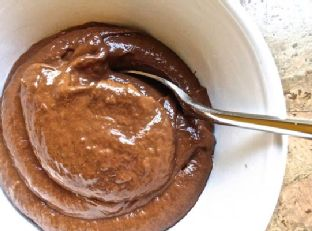

Recipe 2: Bluebird


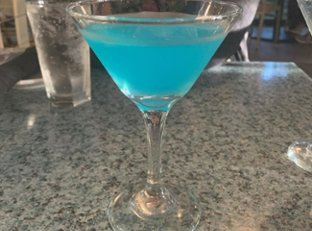

Which recipe would you like to make? You must select one.
Enter your selected number: 1
Banana Chocolate Pudding
Source URL: https://www.foodista.com/recipe/GQNT2SWV/banana-chocolate-roundup
Recipe summary: Banana Chocolate Pudding requires approximately <b>45
minutes</b> from start to finish. Watching your figure? This gluten free, dairy
free, lacto ovo vegetarian, and vegan recipe has <b>526 calories</b>, <b>15g of
protein</b>, and <b>34g of fat</b> per serving. For <b>$1.02 per serving</b>,
this recipe <b>covers 24%</b> of your daily requirements of vitamins and
minerals. This recipe serves 3. This recipe from Foodista has 1 fans. Head to
the store and pick up avocado, bananas, cocoa powder, and a few other things to
make it today. All things considered, we decided this recipe <b>deserves a
spoonacular score of 88%</b>. This score is awesome. Similar recipes are <a
href="https://spoonacular.com/recipes/chocolate-banana-
pudding-1307285">Chocolate Banana Pudding</a>, <a
href="https:/

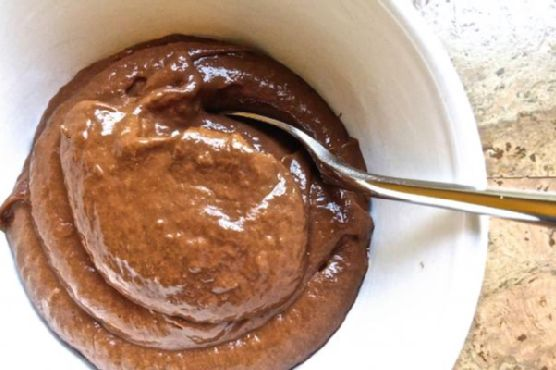


Please type either 'stop' or 'continue.'
Would you like to quit? If so, type 'stop.' Else, type 'continue.' quit


Please type either 'stop' or 'continue.'
Would you like to quit? If so, type 'stop.' Else, type 'continue.' stop


Thank you for using FOOD ORACLE!


In [11]:
s# Main function flow

if __name__ == '__main__':
    print("Welcome to FOOD ORACLE, the recipe recommender!")
    print('\n')
    print('Enter your current mood and season to get a specially tailored recipe!')
    print('\n')

    while True:
      stop_button = input("Would you like to quit? If so, type 'stop.' Else, type 'continue.' ")
      print('\n')
      if stop_button == 'stop':
        print('\n')
        print('Thank you for using FOOD ORACLE!')
        break

      if stop_button == 'continue':
        print('\n')
        user_intro_input = user_mood_season_input()
        if user_intro_input == 'Please try again.': # If user inputs invalid season/mood
          print('Please try again with a valid input.')
          break
        print('\n')
        diet = ask_diet_choice()
        user_intro_input = filter_recipes_by_diet(user_intro_input, diet)
        nice_input = pretty_print_recipes(user_intro_input)
        favorite_recipe(user_intro_input)


      if stop_button != 'stop' or 'continue':
        print('\n')
        print("Please type either 'stop' or 'continue.'")